<a href="https://colab.research.google.com/github/harsh194/machine_learning/blob/main/Embryo_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import os
new_directory = '/content/drive/MyDrive/Harsh/Machine Learning/Embryo Classification'
os.chdir(new_directory)

In [169]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [170]:
train_dir = f"{new_directory}/train/"
classes = os.listdir(train_dir)
classes

['0', '1']

In [171]:
print("Training data")
for f in classes:
    path = train_dir + f
    print(f"{f} - {len(os.listdir(path))}")

Training data
0 - 573
1 - 99


In [172]:
from keras.preprocessing import image

In [173]:
train_data = []
train_labels = []

for category in classes:
    folder = train_dir + category
    for image_name in os.listdir(folder):
        img_path = f"{folder}/{image_name}"
        img = image.load_img(img_path, target_size = (100,100))
        img = image.img_to_array(img)
        train_data.append(img)
        train_labels.append(category)

train_labels

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [174]:
category2label = {'0':0,'1':1}
label2category = {0:'0', 1:'1'}

In [175]:
train_data = np.array(train_data)
train_labels = np.array([category2label[label] for label in train_labels])

In [176]:
train_data.shape

(672, 100, 100, 3)

In [177]:
train_data = train_data.reshape(len(train_data),-1)

In [178]:
train_data.shape

(672, 30000)

In [179]:
train_labels.shape

(672,)

In [180]:
from keras.utils import to_categorical

In [181]:
train_labels = to_categorical(train_labels)

In [182]:
train_labels.shape

(672, 2)

In [183]:
from keras.layers import Dense
from keras import Sequential

In [184]:
features = train_data.shape[1]

In [185]:
from tensorflow.keras.optimizers import Adam

In [186]:
tf.random.set_seed(1234)
model = Sequential()
model.add(Dense(units = 128, activation = 'relu', input_shape = (features,)))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))


In [187]:
test_data = []
test_labels = []

test_dir = f"{new_directory}/test"
classes = os.listdir(test_dir)

for f in classes:
    path = f"{test_dir}/{f}"
    for img_name in os.listdir(path):
        img_path = f"{path}/{img_name}"
        img = image.load_img(img_path, target_size = (100,100))
        img = image.img_to_array(img)
        test_data.append(img)
        test_labels.append(f)


In [188]:
test_data = np.array(test_data)
test_data = test_data.reshape(len(test_data), -1)
test_labels = np.array([category2label[label] for label in test_labels])
true_labels = test_labels
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [189]:
test_labels = to_categorical(test_labels)

In [190]:
batch_sizes = [21,42,84,168]
# batch_sizes = 21

In [191]:
# from tensorflow import keras
# modelb = keras.models.clone_model(model)
# custom_optimizer = Adam(learning_rate=0.001)
# modelb.compile(optimizer = custom_optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
# history = modelb.fit(train_data, train_labels, batch_size = batch, epochs = 10)
# pred = modelb.predict(test_data).argmax(axis=1)

In [194]:
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score

precisions =[]
recalls = []
fs = []
his = []

for batch in batch_sizes:
    modelb = keras.models.clone_model(model)
    custom_optimizer = Adam(learning_rate=0.001)
    modelb.compile(optimizer = custom_optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
    history = modelb.fit(train_data, train_labels, batch_size = batch, epochs = 200)
    pred = modelb.predict(test_data).argmax(axis=1)
    precision = precision_score(true_labels, pred)
    recall = recall_score(true_labels, pred)
    f1 = f1_score(true_labels, pred)
    precisions.append(precision)
    recalls.append(recall)
    fs.append(f1)
    his.append(history)

Epoch 1/200
32/32 [==============================] - 3s 54ms/step - loss: 549.5332 - accuracy: 0.7277
Epoch 2/200
32/32 [==============================] - 2s 49ms/step - loss: 401.2858 - accuracy: 0.7619
Epoch 3/200
32/32 [==============================] - 2s 59ms/step - loss: 139.8846 - accuracy: 0.7827
Epoch 4/200
32/32 [==============================] - 2s 58ms/step - loss: 105.4928 - accuracy: 0.8140
Epoch 5/200
32/32 [==============================] - 2s 47ms/step - loss: 249.9262 - accuracy: 0.7574
Epoch 6/200
32/32 [==============================] - 1s 44ms/step - loss: 153.1502 - accuracy: 0.7902
Epoch 7/200
32/32 [==============================] - 1s 45ms/step - loss: 93.1820 - accuracy: 0.8214
Epoch 8/200
32/32 [==============================] - 1s 45ms/step - loss: 44.6747 - accuracy: 0.8631
Epoch 9/200
32/32 [==============================] - 1s 43ms/step - loss: 135.4063 - accuracy: 0.7961
Epoch 10/200
32/32 [==============================] - 1s 43ms/step - loss: 77.0888 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/200
16/16 [==============================] - 2s 49ms/step - loss: 476.6038 - accuracy: 0.6771
Epoch 2/200
16/16 [==============================] - 1s 51ms/step - loss: 364.8413 - accuracy: 0.7307
Epoch 3/200
16/16 [==============================] - 1s 51ms/step - loss: 623.2960 - accuracy: 0.7574
Epoch 4/200
16/16 [==============================] - 1s 51ms/step - loss: 525.3833 - accuracy: 0.7693
Epoch 5/200
16/16 [==============================] - 1s 49ms/step - loss: 181.7642 - accuracy: 0.7768
Epoch 6/200
16/16 [==============================] - 1s 50ms/step - loss: 154.2846 - accuracy: 0.7649
Epoch 7/200
16/16 [==============================] - 1s 51ms/step - loss: 109.4279 - accuracy: 0.7991
Epoch 8/200
16/16 [==============================] - 1s 50ms/step - loss: 77.9050 - accuracy: 0.7679
Epoch 9/200
16/16 [==============================] - 1s 50ms/step - loss: 74.9352 - accuracy: 0.8051
Epoch 10/200
16/16 [==============================] - 1s 50ms/step - loss: 51.0557 -

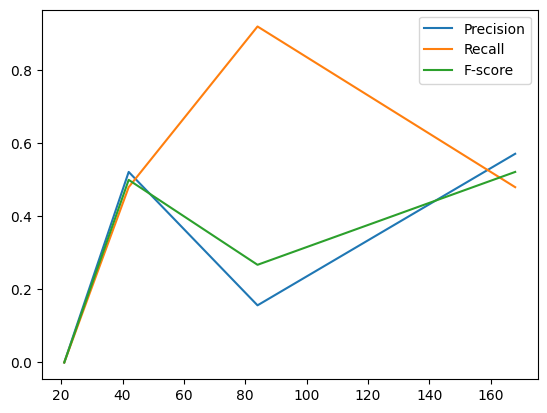

In [195]:
plt.plot(batch_sizes,precisions, label='Precision')
plt.plot(batch_sizes,recalls, label = 'Recall')
plt.plot(batch_sizes,fs, label = 'F-score')
plt.legend()

In [202]:
l =[]
a = []
i =0
for h in his:
    loss = h.history['loss']
    accuracy = h.history['accuracy']
    i +=1
    l.append(loss)
    a.append(accuracy)


In [208]:
len(l)

4

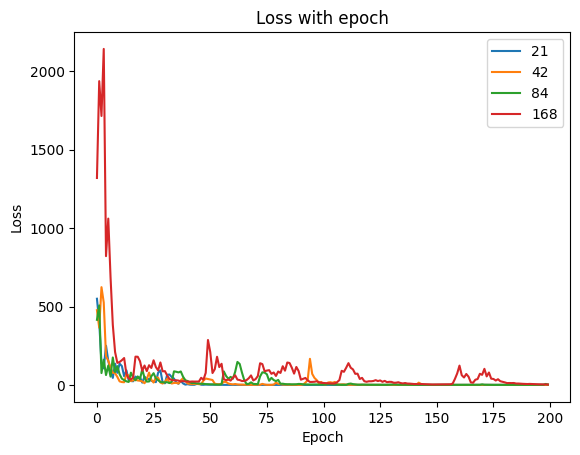

In [212]:
plt.plot(l[0], label = '21')
plt.plot(l[1], label = '42')
plt.plot(l[2], label = '84')
plt.plot(l[3], label = '168')
plt.title("Loss with epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

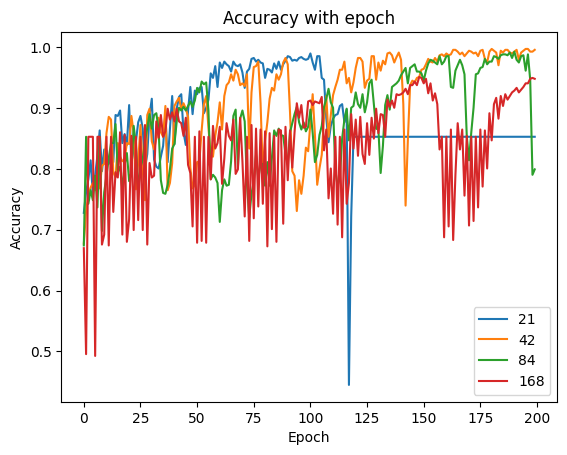

In [213]:
plt.plot(a[0], label = '21')
plt.plot(a[1], label = '42')
plt.plot(a[2], label = '84')
plt.plot(a[3], label = '168')
plt.title("Accuracy with epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()